<a href="https://colab.research.google.com/github/LucasMonteiroBastos/Analise-de-Credito---Part-I/blob/main/ANALISE_DE_CREDITO_PREDIZER_SE_A_PESSOA_PAGOU_OU_N%C3%83O_O_EMPR%C3%89STIMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAÇÃO DAS BIBLIOTECAS

In [3]:
# Libs necessarias 

# Matriz e Modelagem
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

CARREGANDO BASE DE DADOS

In [4]:
# Carregando a Base de Dados
Base_De_Dados = pd.read_csv('/content/credit_data.csv')

In [5]:
# Lendo a Base de Dados
Base_De_Dados.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
# clientid -> cliente
# income -> renda / salario 
# age -> idade
# loan -> emprestimo
# default -> inadiplente

In [7]:
# estatisticas
Base_De_Dados.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [8]:
# buscando a pessoa com maior renda
Base_De_Dados[Base_De_Dados['income'] >= 69995.685578]

,clientid,income,age,loan,default
422,423,69995.685578,52.719673,2084.370861,0


In [9]:
# buscando a pessoa com a menor divida
Base_De_Dados[Base_De_Dados['loan']  <= 1.377630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


In [10]:
# contagem de registros na classe 'default'
np.unique(Base_De_Dados['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

VISUALIZAÇÃO DOS DADOS

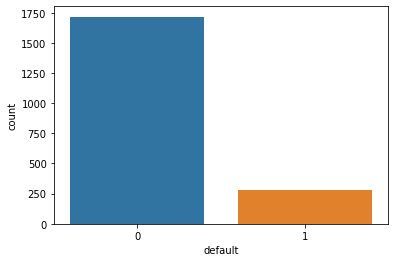

In [11]:
# contagem de registros na classe 'default'
sns.countplot(x=Base_De_Dados['default']);

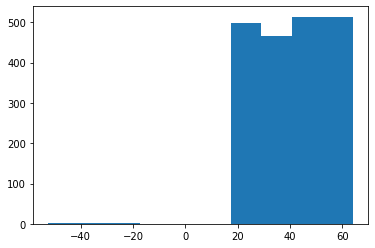

In [12]:
# distribuição de idade na Base de Dados
plt.hist(x=Base_De_Dados['age']);

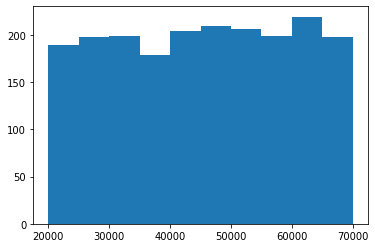

In [13]:
# distribuição de renda
plt.hist(x=Base_De_Dados['income']);

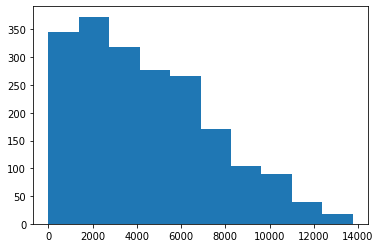

In [14]:
  # distribuição das dividas
  plt.hist(x=Base_De_Dados['loan']);

In [15]:
# Gráfico de dispersão Idade x Renda
grafico = px.scatter_matrix(Base_De_Dados, dimensions=['age', 'income', 'loan'], color='default')
grafico.show();

TRATAMENTO DE VALORES INCONSISTENTES

In [16]:
# Localizando as idades que são menores que ZERO
Base_De_Dados.loc[Base_De_Dados['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [17]:
# TECNICA 1º FRACO


# apagando a coluna inteira (de todos os registros da base de dados)
Base_De_Dados2 = Base_De_Dados.drop('age', axis= 1)
Base_De_Dados2

,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [18]:
# Identificando no index, quais são as idades menor que ZERO
Base_De_Dados[Base_De_Dados['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [19]:
# TECNICA 2º MEIO - FRACO



# Apagando somente os registros com valores incosistentes

# Dropando na Base de Dados os Index onde a idade é menor que ZERO
Base_De_Dados3 = Base_De_Dados.drop(Base_De_Dados[Base_De_Dados['age'] < 0].index)
Base_De_Dados3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [20]:
# confirmando as alterações
Base_De_Dados3.loc[Base_De_Dados3['age'] < 0]

,clientid,income,age,loan,default


In [21]:
# TECNICA 3º BOM E MAIS RECOMENDADO

# Preencher os valores inconsistentes manualmente com a media das idades

# Buscando a media de todos os atributos / classes
Base_De_Dados.mean()



clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [22]:
# buscando a media das idades maiores que ZERO
Base_De_Dados['age'][Base_De_Dados['age'] > 0].mean() 

40.92770044906149

In [23]:
# atribuindo a media de idade aos valores que são menores que ZERO
Base_De_Dados.loc[Base_De_Dados['age'] < 0,'age'] = 40.92

In [24]:
# certificando as alterações
Base_De_Dados.loc[Base_De_Dados['age'] < 0]

,clientid,income,age,loan,default


In [25]:
Base_De_Dados.head(30)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


TRATAMENTO DE VALORES FALTANTES

In [26]:
# Buscando valores nulos na base
Base_De_Dados.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [27]:
# Buscando apenas os valores nulos na coluna age
Base_De_Dados.loc[pd.isnull(Base_De_Dados['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [28]:
# Preenchendo os valores nulos na coluna age com a media da idade
Base_De_Dados['age'].fillna(Base_De_Dados['age'].mean(), inplace=True)

In [29]:
# Verificando as modificações
Base_De_Dados.loc[(Base_De_Dados['clientid'] == 29) | (Base_De_Dados['clientid'] == 30) | (Base_De_Dados['clientid'] == 31)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
29,30,58842.891308,54.510948,10871.186790,0
30,31,48528.852796,40.927689,6155.784670,0


In [30]:
# Consultando as modificações de outra maneira
Base_De_Dados.loc[Base_De_Dados['clientid'].isin([29, 30, 31])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
29,30,58842.891308,54.510948,10871.186790,0
30,31,48528.852796,40.927689,6155.784670,0


DIVISÃO ENTRE OS PROVISORES E A CLASSE


In [31]:
# Passando a variavel X como os previsores
X_credit = Base_De_Dados.iloc[:, 1:4].values

In [32]:
# Verificando
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [33]:
# Atribuindo a classe a variavel Y
y_credit = Base_De_Dados.iloc[:, 4].values

In [34]:
# Verificando
y_credit

array([0, 0, 0, ..., 1, 0, 0])

In [35]:
# menor renda           # menor idade         # menor divida
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [36]:
#mair renda           #maior idade            #maior divida
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [37]:
# Aplicando a padronizão entre os dados
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [38]:
# Verificando as mudanças nos valores minimos
X_credit[:, 0].min(), X_credit[:, 1].min(), X_credit[:, 2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [39]:
# Verificando as mudanças nos valores maximos
X_credit[:, 0].max(), X_credit[:, 1].max(), X_credit[:, 2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

  DIVISÃO DA BASE EM TREINAMENTO E TESTE


In [40]:
# libs para dividi entre treino e teste
from sklearn.model_selection import train_test_split

In [41]:
# dividindo entre X treino e y teste
X_credito_treinamento, X_credito_teste, y_credito_treinamento, y_credito_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)


In [42]:
# analisando shape de X 
X_credito_treinamento.shape

(1500, 3)

In [43]:
# analisando o shaoe de y
y_credito_treinamento.shape

(1500,)

In [44]:
# analisando o shape de X teste e y treino
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

SALVANDO A BASE DE DADOS JÁ PRE-PROCESSADA E TRATADA

In [45]:
import pickle
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credito_treinamento, y_credito_treinamento, X_credito_teste, y_credito_teste], f)



TRABALHANDO NA BASE JÁ PRÉ-PROCESSADA E TRATADA


In [46]:
# lendo a base tratada
#with open('credit.pkl', 'rb') as f:
  #X_credito_treinamento, y_credito_treinamento, X_credito_teste, y_credito_teste = pickle.load(f)

In [47]:
# analisando x treino e y teste
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [48]:
# analisando a base de teste
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [49]:
# analisando o shape TREINAMENTO

# X -> atributos previsores |income|age|loan
# y -> somente a classe default 0|1
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [50]:
# analisando o shape de TESTE
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

IMPLEMENTANDO O ALGORITMO NAIVE BAYES

In [51]:
# importando o algoritmo Naive Bayes
from sklearn.naive_bayes import GaussianNB

# isntalanciando uma variavel
# naive_credit_data está recebendo uma instancia de GaussianNB
naive_credito_data = GaussianNB()
naive_credito_data.fit(X_credito_treinamento, y_credito_treinamento)

GaussianNB()

In [52]:
previsoes = naive_credito_data.predict(X_credito_teste)

In [53]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
accuracy_score(y_credito_teste, previsoes)

0.938

In [57]:
confusion_matrix(y_credito_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [58]:
from yellowbrick.classifier import ConfusionMatrix

0.938

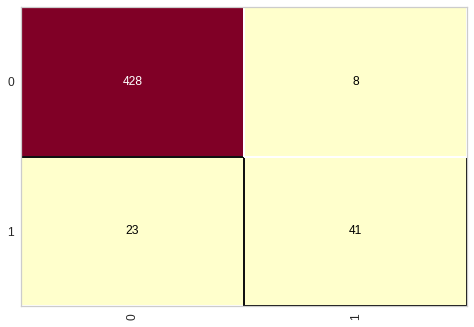

In [59]:
cm = ConfusionMatrix(naive_credito_data)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [60]:
 print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



CRIANDO A ARVORE DE DECISÃO

In [61]:
# implementando o algoritmo
from sklearn.tree import DecisionTreeClassifier

In [62]:
# criando a arvore de decisão                                         o rando state é: sempre que rodar o algoritmo ele sempre mostrar os mesmos resultados
arvore_credito = DecisionTreeClassifier(criterion='entropy', random_state=0)

# fazendo o treinamento
arvore_credito.fit(X_credito_treinamento, y_credito_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
# fazendo as previsões
previsoes = arvore_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
# fazendo a comparação 
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

ANALISANDO AS METRICAS

In [65]:
# libs
from sklearn.metrics import accuracy_score, classification_report

In [66]:
# calculando a acuracia // taxa de acerto
accuracy_score(y_credito_teste, previsoes)

0.982

GERANDO A MATRIX DE CONFUSÃO


0.982

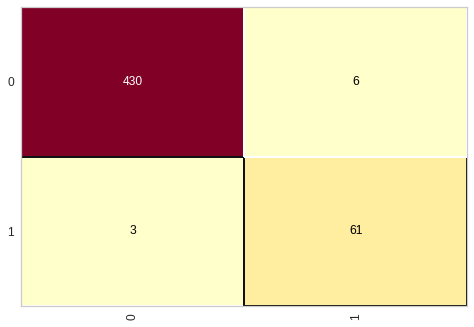

In [67]:
# criando matriz
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [68]:
# visualizando o classficador de reporte
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



VISUALIZANDO A ARVORE DE DECISÃO

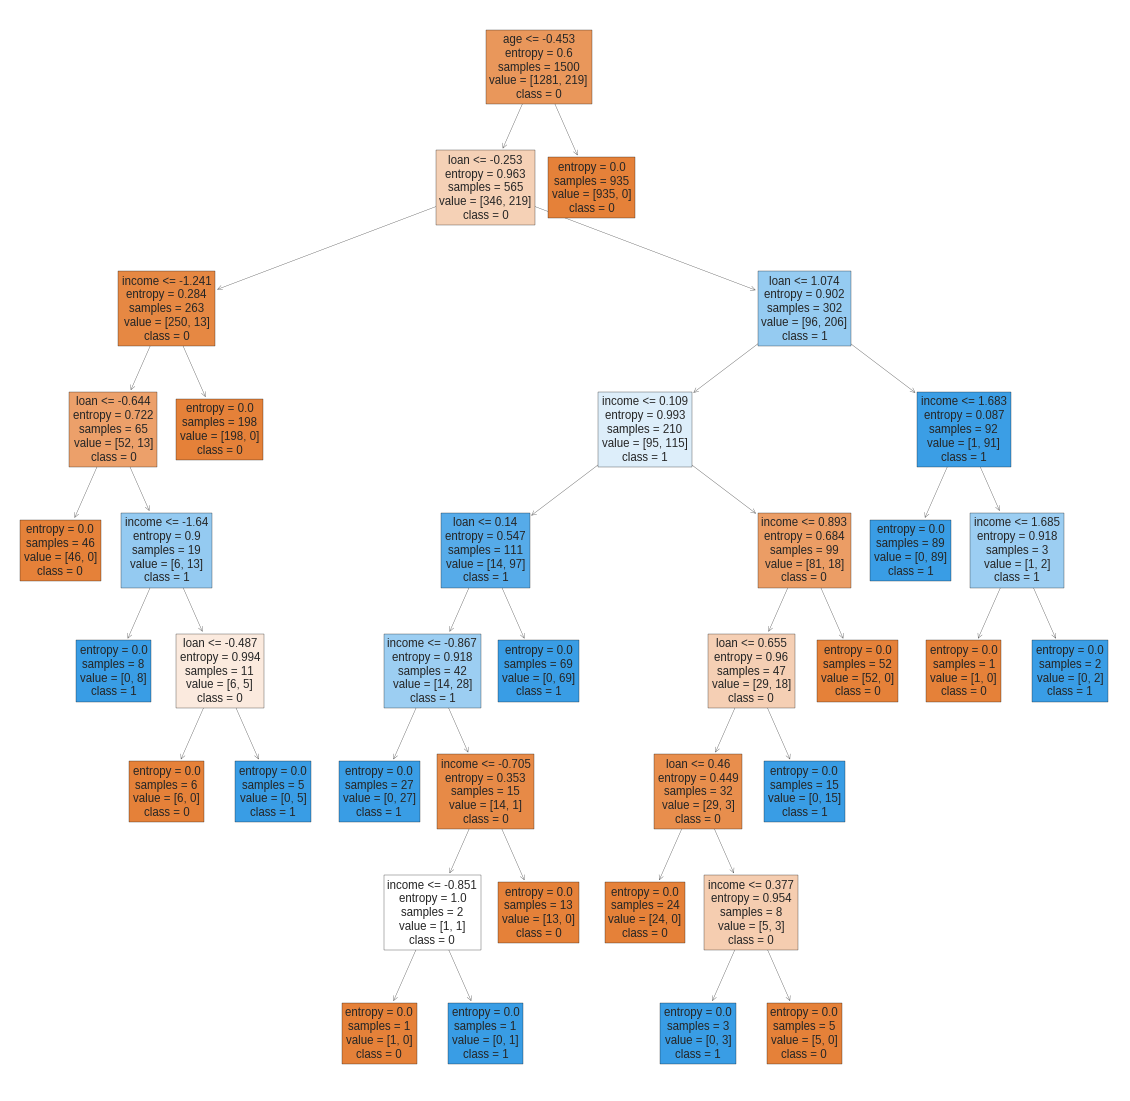

In [69]:
# implementando a arvore
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
tree.plot_tree(arvore_credito, feature_names=previsores, class_names=['0','1'], filled=True);
fig.savefig('arvore_credito.png')


IMPLEMENTANDO O ALGORITMO RANDOM FOREST

In [70]:
# libs
from sklearn.ensemble import RandomForestClassifier

In [71]:
# usando 1500 registros para treinar
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [72]:
# usando 500 registro para fazer a avaliação
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [73]:
# criando o random forest
random_forest_credito = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)

In [74]:
# fazendo o treinamento
random_forest_credito.fit(X_credito_treinamento, y_credito_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [75]:
# previsoes
previsoes = random_forest_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
# respostas reais
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
# metricas
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credito_teste, previsoes)

0.984

0.984

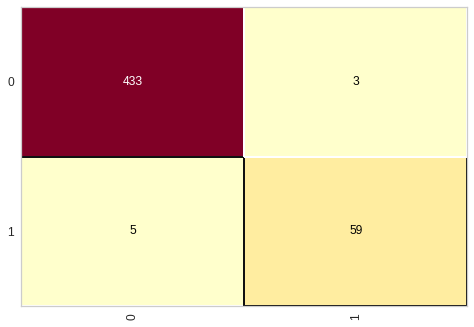

In [78]:
# matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [79]:
# classification reportes
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500



In [80]:
# quantidade de registros para treino
X_credito_treinamento.shape, y_credito_treinamento.shape

((1500, 3), (1500,))

In [82]:
# quantidade de registros para testar
X_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

IMPLEMANTANDO O ALGORITMO KNN

In [83]:
# importando o Knn
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# criando o modelo
knn_credito = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credito.fit(X_credito_treinamento, y_credito_treinamento)

KNeighborsClassifier()

In [86]:
# fazendo as previsoes ou classficação
previsoes = knn_credito.predict(X_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
# respostas reais na base de dados
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [89]:
# calculando a acuracia
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credito_teste, previsoes)
# ESSE RESULTADO SÓ FOI POSSIVEL POR MEIO DA PADRONIZAÇÃO 

0.986

0.986

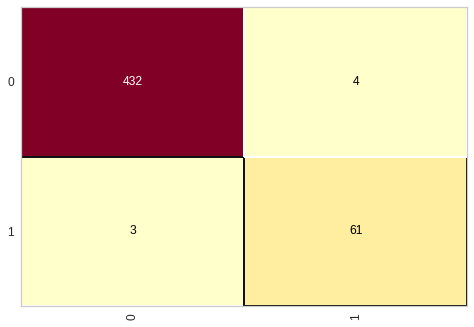

In [91]:
# visualizando a matrix de confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credito)
cm.fit(X_credito_treinamento, y_credito_treinamento)
cm.score(X_credito_teste, y_credito_teste)

In [92]:
# analisando o classfication report
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500

